# Task 02 - Prediction using Unsupervised ML

# By Gaurav Wankhede

Here I'm going to predict the optimum number of clusters from the given iris-dataset and represent it visually 

In [2]:
# Import Necessary Librabries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [43]:
# To load dataset 
from sklearn import datasets
iris_data = datasets.load_iris()

In [151]:
# Let's give labels to the dataset
label = ["sepal_length","sepal_width","petal_length","petal_width"]

In [152]:
iris = pd.DataFrame(iris_data.data, columns=label)

In [149]:
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [75]:
iris.shape

(150, 4)

In [99]:
iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [95]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [97]:
# To Actual Dataset 
iris = datasets.load_iris()
iris = pd.DataFrame(iris.data, columns=iris.feature_names)
iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [98]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


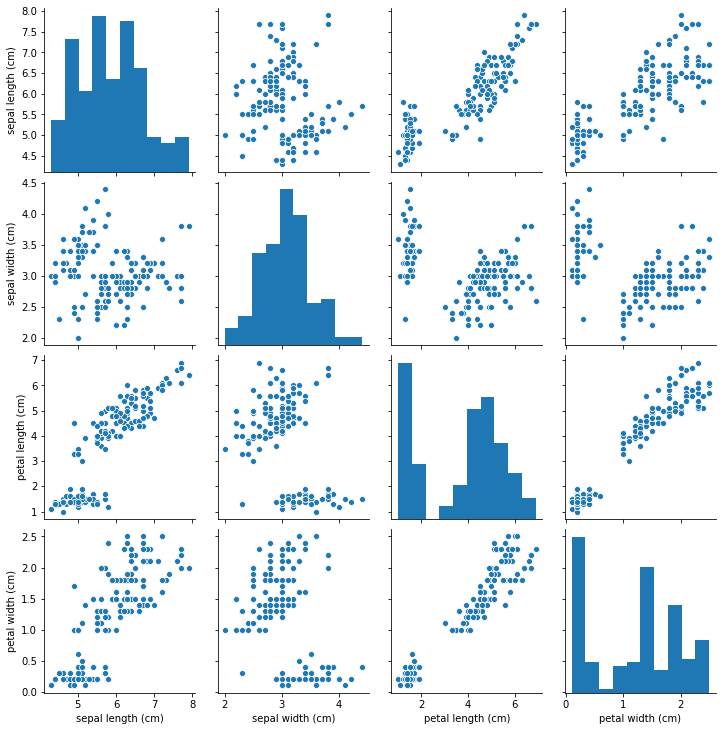

In [100]:
# Plotting pair plot
sns.pairplot(iris)

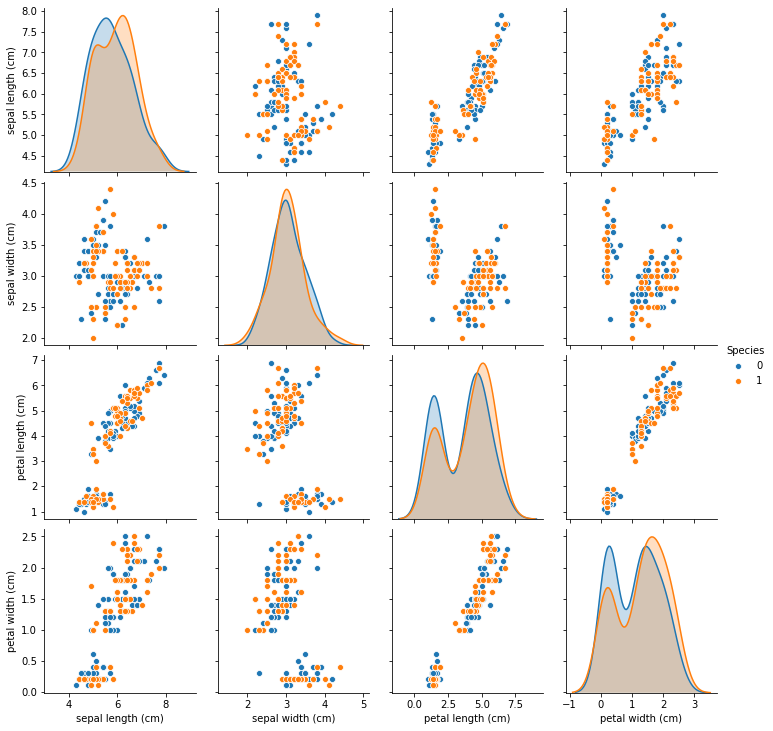

In [104]:
iris['Species'] = np.random.choice(2,150)
sns.pairplot(iris, hue="Species", height=2.5)

# K Mean Clustering

In [109]:
X = iris.iloc[:,[0,1,2,3]].values

In [113]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Finding the optimum number of clusters using elbow method

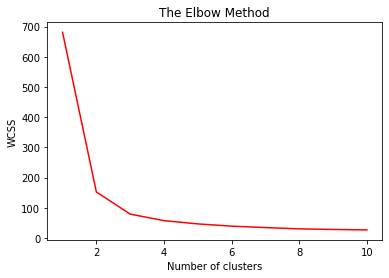

In [119]:
plt.plot(range(1,11), wcss, color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply KMeans to the dataset for predicting

In [122]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=10)
kmeans_pred = kmeans.fit_predict(X)
kmeans_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

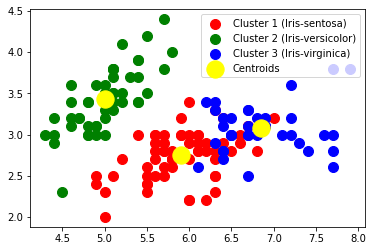

In [145]:
# Plotting 

plt.scatter(X[kmeans_pred == 0,0], X[kmeans_pred == 0,1], s=100, c='red', label = 'Cluster 1 (Iris-sentosa)')
plt.scatter(X[kmeans_pred == 1,0], X[kmeans_pred == 1,1], s=100, c='green', label = 'Cluster 2 (Iris-versicolor)')
plt.scatter(X[kmeans_pred == 2,0], X[kmeans_pred == 2,1], s=100, c='blue', label = 'Cluster 3 (Iris-virginica)')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='yellow', label='Centroids')
plt.legend()